## Estimating broad-sense Heritability ($H^{2}$)

Heritability is the proportion of phenotypic variance that can be attributed to genetic differences among individuals. It is defined as the ratio of genetic to total phenotypic variation in a population:


<center>Phenotype (P) = Genotype (G) + Environment (E)</center>


The genetic component of phenotypic variance can be separated into additive, dominance, and interaction (G x G) effects. Each of these components of variance contribute to broad-sense heritability:

\begin{equation*}
H^{2} = \frac{VG}{VP} 
\end{equation*}


<center>or</center>


\begin{equation*}
H^{2} = \frac{Va + Vd + Vi}{VP} 
\end{equation*}


There are several ways to estimate broad-sense heritability. For those of us that work on inbred lines, we can model the variance due to genetics and the environment using a mixed-effects model, while including the accession-id (also known as the genotype or ecotype in some fields of research) as a random effect. We can then use a trick described in [this paper](https://besjournals.onlinelibrary.wiley.com/doi/10.1111/j.2041-210x.2012.00261.x) and implemented in code described [here](https://jonlefcheck.net/2013/03/13/r2-for-linear-mixed-effects-models/).

***

### Load the data

To investigate broad-sense heritability, let's use [publicly available](http://www.pnas.org/content/112/13/4032) glucosinolate data. The formatted data can be downloaded here:

curl https://raw.githubusercontent.com/timeu/gwas-lecture/master/data/cmeyer_glucs2015/bmeyer_etal.txt --create-dirs --output data/cmeyer_glucs2015/bmeyer_etal.txt

This is the R-script for estimating marginal and conditional variance in a mixed-model (merMod):<br>
curl https://raw.githubusercontent.com/timeu/gwas-lecture/master/data/cmeyer_glucs2015/hdr.estimate_r2_mixedmodels.R --create-dirs --output data/cmeyer_glucs2015/hdr.estimate_r2_mixedmodels.R

In [1]:
## if lme4 or RLRsim isn't installed, run:
## install.packages("lme4");
## install.packages("RLRsim");

library(lme4);
library(RLRsim);
source("data/cmeyer_glucs2015/hdr.estimate_r2_mixedmodels.R");

glucosinolateFileName <- "data/cmeyer_glucs2015/bmeyer_etal.txt";
glucs <- read.table(glucosinolateFileName, header=T, sep="\t", as.is=T, stringsAsFactors=FALSE);
glucs <- glucs[order(glucs[,"accession_id"]),];

Warning message:
“package ‘lme4’ was built under R version 3.4.4”Loading required package: Matrix


In [2]:
dim(glucs);

[1] 2199   24

In [3]:
head(glucs);

,accession_id,sample_weight,G2P,G3B,G3HP,G4P,G2H3B,G4HB,G2H4P,G3MTP,⋯,G6MTH,G5MSP,G7MTH,G6MSH,G8MTO,G7MSH,G3BOP,G8MSO,G4BOB,G5BOP
892,1,27.0,1391.3143,103708.84,35.89132,5248.4694,25310.19,0.000000,656.2984,0,⋯,3611.0269,32.32934,2951.46171,96.03157,8243.8638,2142.1924,0.00000,23523.238,1424.3284,0.00000
1692,1,22.1,7734.5149,69932.37,0.00000,2500.7568,24289.34,0.000000,390.3385,0,⋯,116.8998,56.07342,0.00000,247.84098,0.0000,1401.4957,67.66343,27462.923,1789.0852,920.67350
683,2,15.2,8267.7205,144750.06,202.10448,5545.6431,78817.75,7.136438,1966.7867,0,⋯,411.9168,76.65779,0.00000,1016.59783,0.0000,11407.0228,0.00000,102816.760,8169.7092,3357.24848
870,2,29.9,1411.4871,27739.70,0.00000,116.5999,24817.58,0.000000,435.3465,0,⋯,2256.3011,0.00000,46.88039,0.00000,577.0562,389.6314,0.00000,7644.041,284.5212,0.00000
887,2,31.0,1055.4795,82117.61,88.72688,2589.5366,29056.36,32.245193,1213.7386,0,⋯,8806.8255,227.51344,3107.01884,428.95742,18943.1403,2913.7202,0.00000,36178.023,2610.6636,61.77065
973,2,30.9,967.1328,38721.42,0.00000,880.6843,17378.24,34.532081,391.1320,0,⋯,2292.2790,0.00000,810.27345,93.65825,2614.6889,970.8893,0.00000,9763.230,493.1664,0.00000


In [4]:
str(glucs);

## note that accession_id isn't a factor yet...
## it is numeric, so it is important to be explicit...

'data.frame':	2199 obs. of  24 variables:
 $ accession_id : int  1 1 2 2 2 2 4 4 4 6 ...
 $ sample_weight: num  27 22.1 15.2 29.9 31 30.9 17.8 24.6 29.5 18.3 ...
 $ G2P          : num  1391 7735 8268 1411 1055 ...
 $ G3B          : num  103709 69932 144750 27740 82118 ...
 $ G3HP         : num  35.9 0 202.1 0 88.7 ...
 $ G4P          : num  5248 2501 5546 117 2590 ...
 $ G2H3B        : num  25310 24289 78818 24818 29056 ...
 $ G4HB         : num  0 0 7.14 0 32.25 ...
 $ G2H4P        : num  656 390 1967 435 1214 ...
 $ G3MTP        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ G4MTB        : num  322 0 0 0 323 ...
 $ G3MSP        : num  0 0 0 0 0 ...
 $ G5MTP        : num  0 0 0 0 80.3 ...
 $ G4MSB        : num  0 68.6 87 0 22.5 ...
 $ G6MTH        : num  3611 117 412 2256 8807 ...
 $ G5MSP        : num  32.3 56.1 76.7 0 227.5 ...
 $ G7MTH        : num  2951.5 0 0 46.9 3107 ...
 $ G6MSH        : num  96 248 1017 0 429 ...
 $ G8MTO        : num  8244 0 0 577 18943 ...
 $ G7MSH        : num  2142 140

In [5]:
glucs$accession_id <- as.factor(glucs$accession_id);

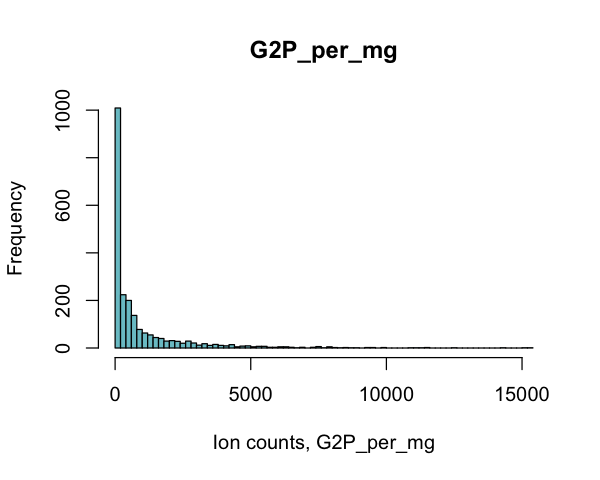

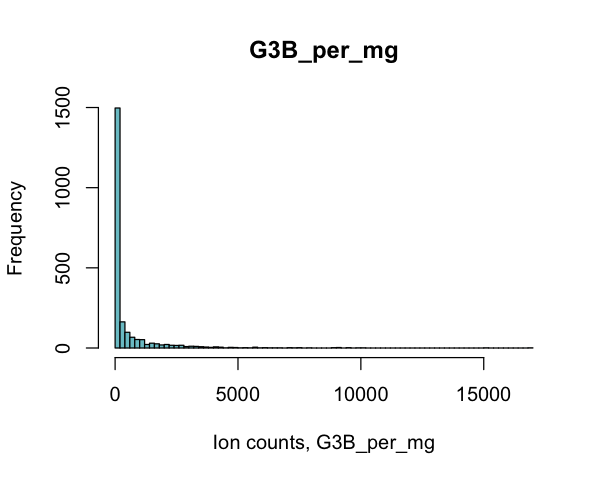

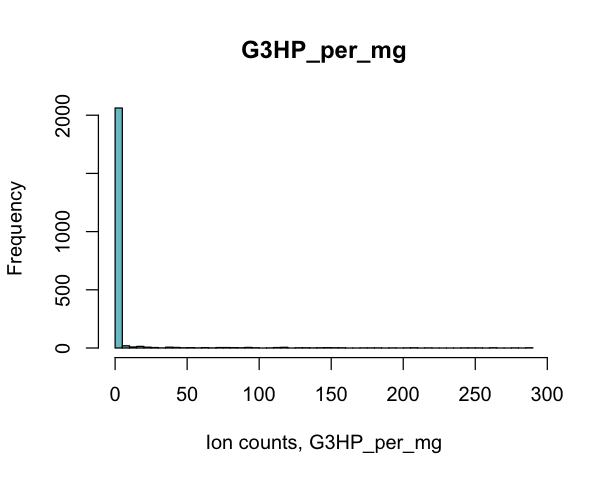

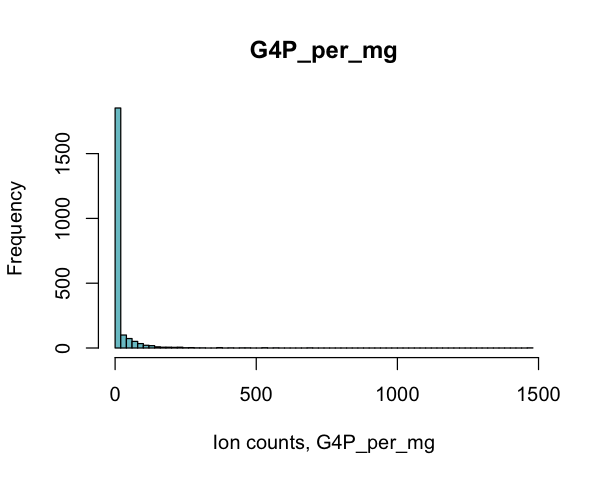

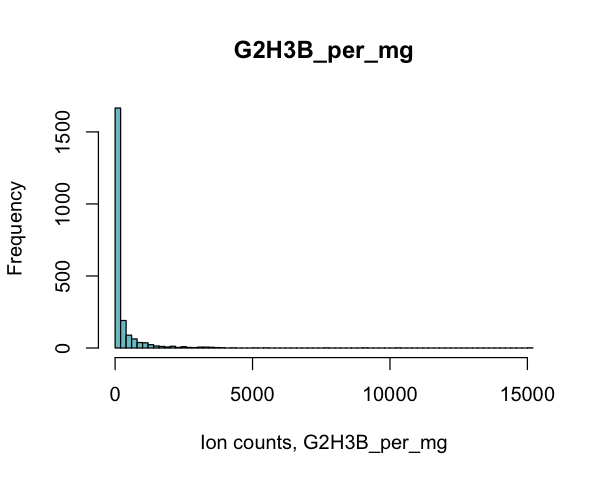

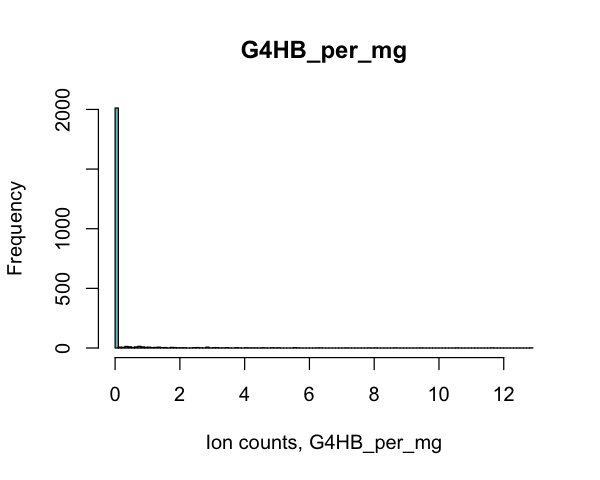

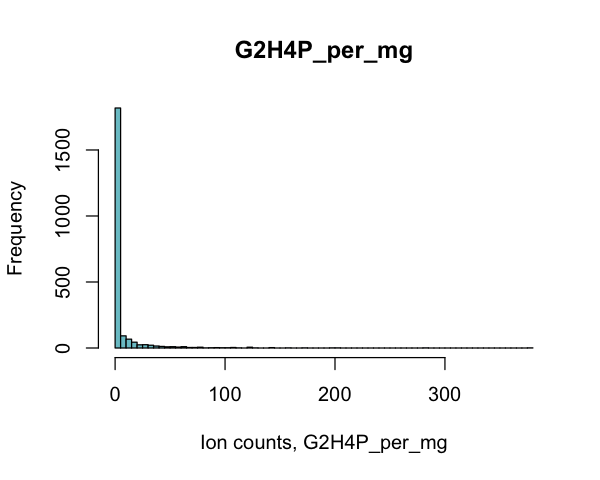

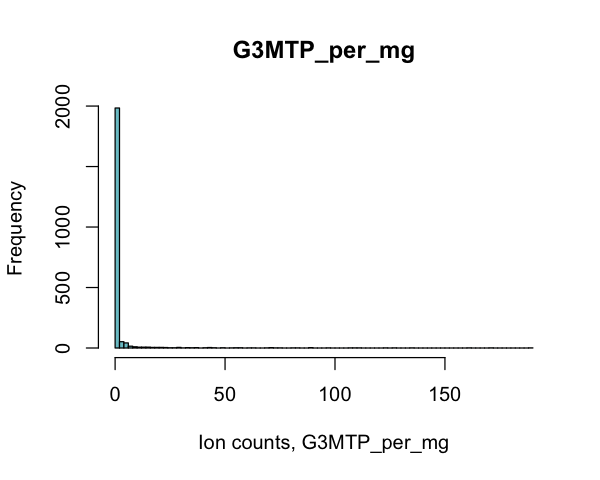

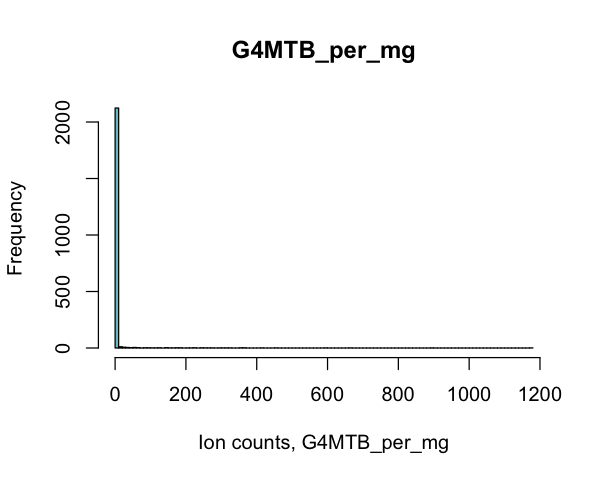

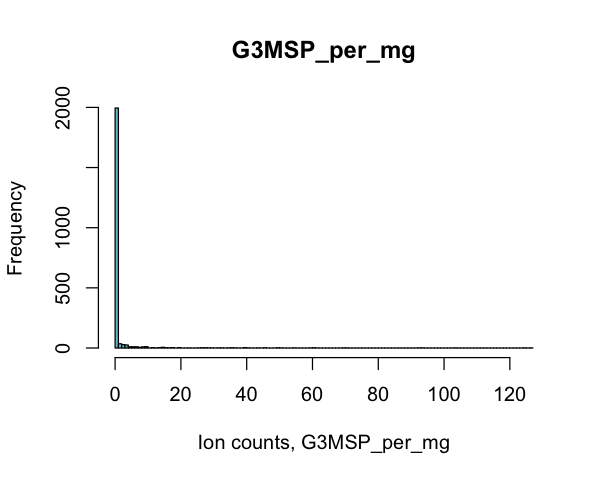

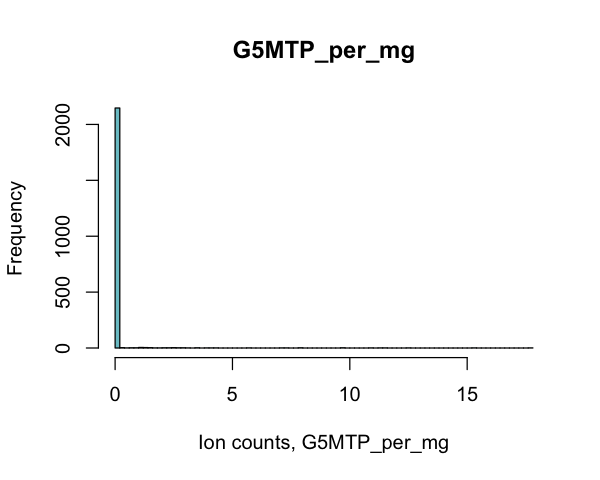

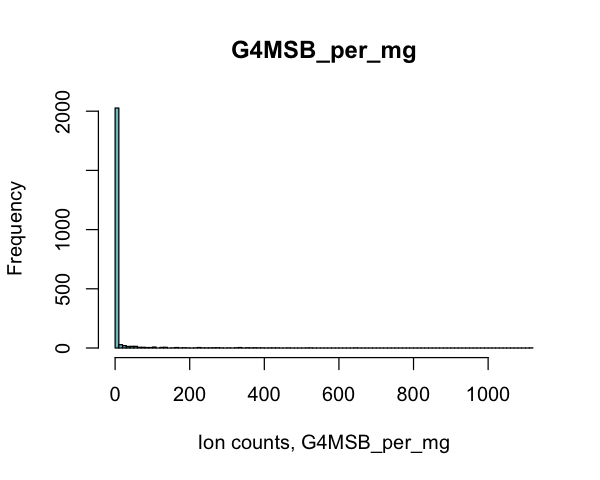

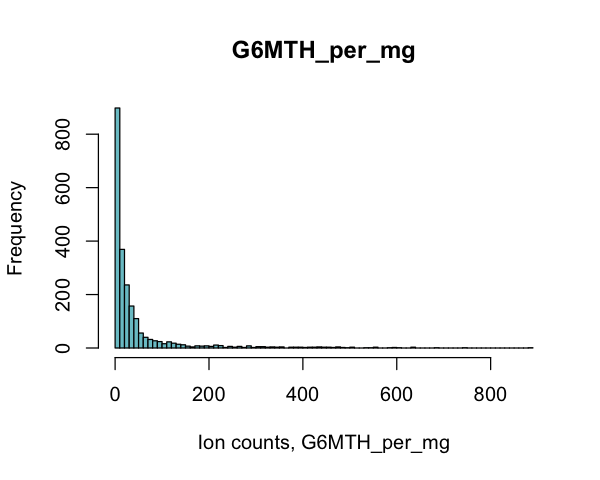

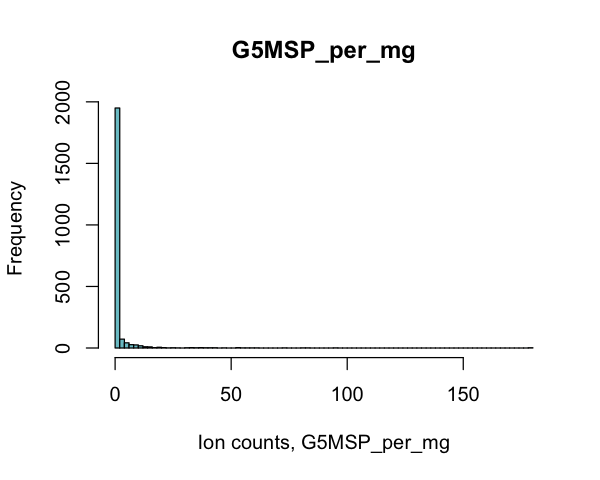

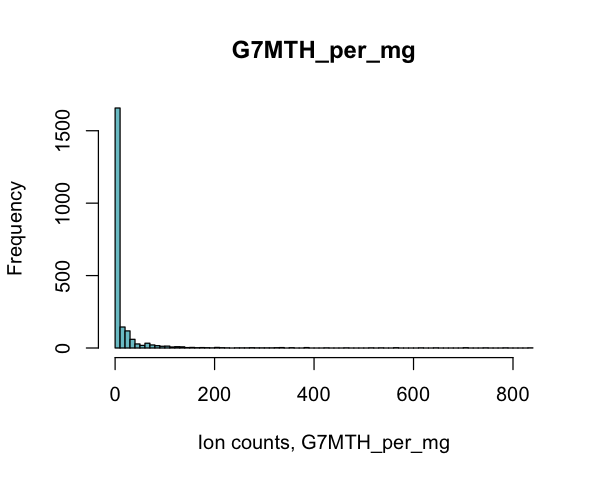

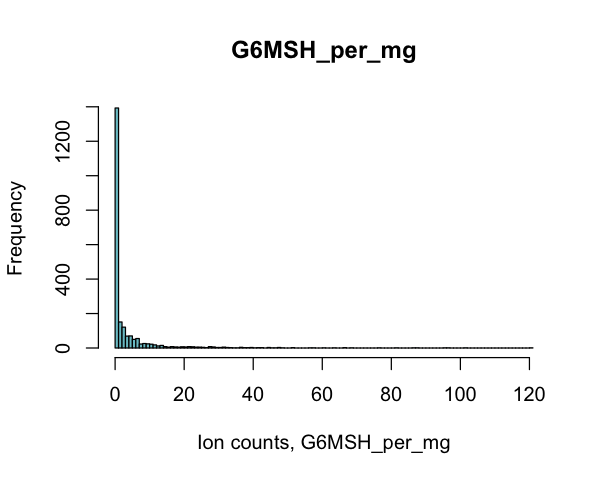

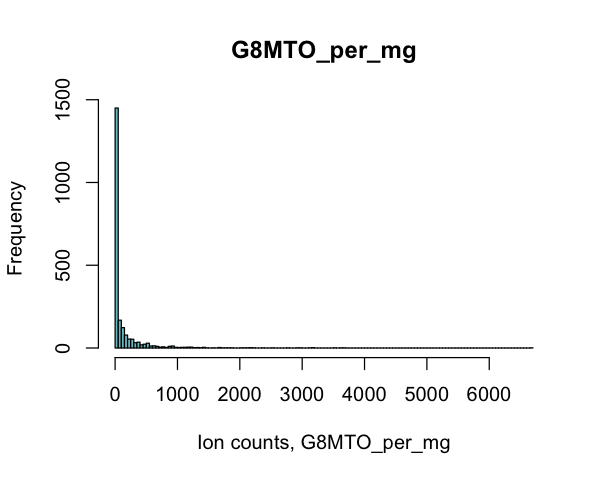

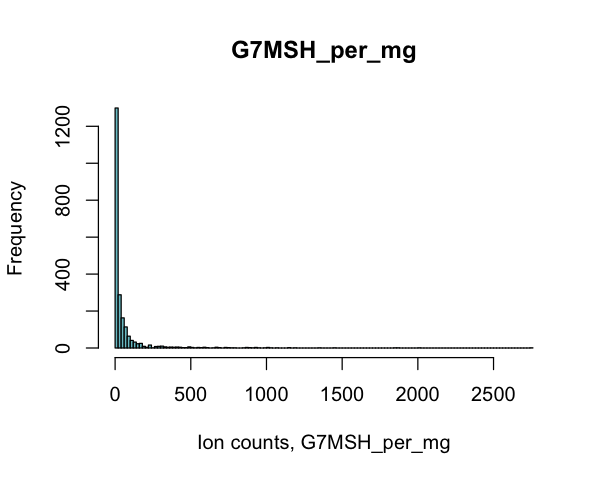

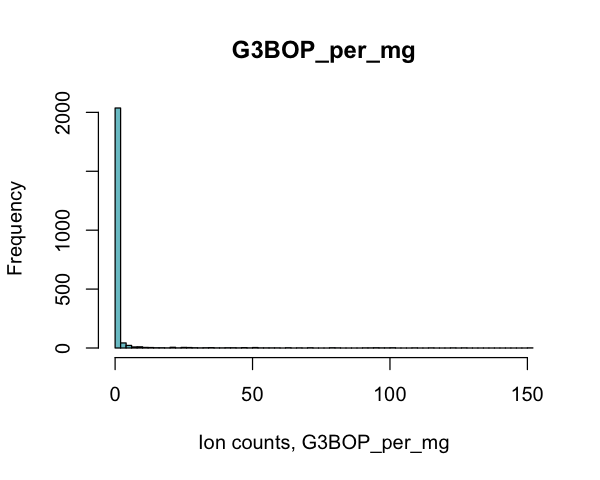

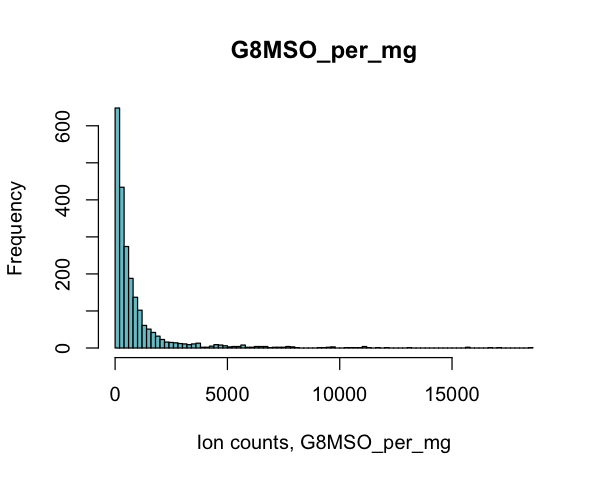

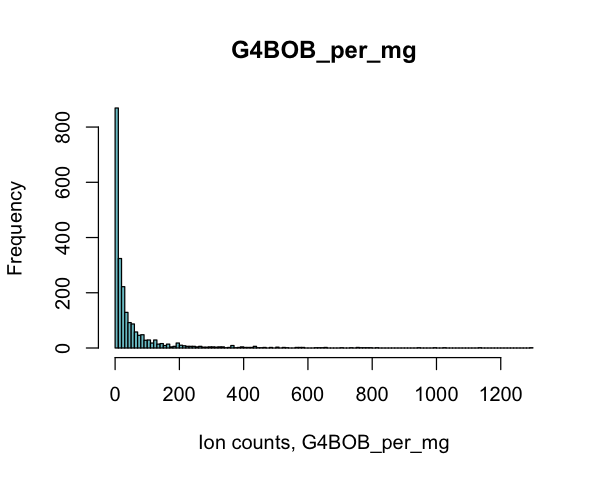

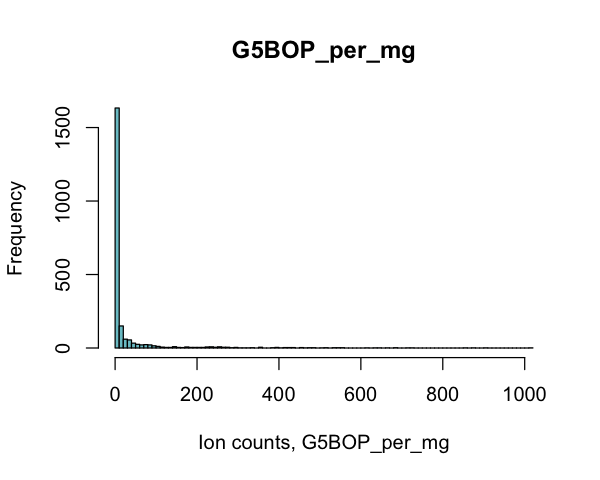

In [6]:
## adjust the ion counts by sample weight
for( j in 3:ncol(glucs)){
    glucosinolateVariableName <- colnames(glucs)[j];
    glucs[[paste0(glucosinolateVariableName, "_per_mg")]] <- glucs[,glucosinolateVariableName] / glucs[,"sample_weight"]; ## in mg
}

## there are 22 glucosinolate phenotypes, let's look at their distributions
options(repr.plot.width=5, repr.plot.height=4)

scaledGlucosinolates <- colnames(glucs)[grep("per_mg$", colnames(glucs))];
for( col_j in scaledGlucosinolates ){
    scaledGluc_j <- glucs[,col_j];
    hist(scaledGluc_j, breaks=100, col="cadetblue3", main=col_j, xlab=paste0("Ion counts, ", col_j));
}

There's a surprising amount of zero-inflation in the data. To analyze data such as these, one can choose between (a) a zero-inflated model, (b) logistic regression (focusing on presence/absence of each metabolite), (c) attempting to standardize the data and analyze it using traditional linear approaches (not recommended but the most common approach; linear models are very robust), (d) analyzing the data as presence/absence data and, separately, abundance data before combining the results using Brown's _P_ value or a weighted Z-score approach. 

### Let's use linear models to investigate the data, which is what the authors did

In [7]:
results <- data.frame(method=character(), glucosinolate_name=character(), H2=numeric(), pvalue=numeric(), stringsAsFactors=FALSE);

scaledGlucosinolates <- colnames(glucs)[grep("per_mg$", colnames(glucs))]; print(scaledGlucosinolates);
for( col_j in scaledGlucosinolates ){
        cat("Investigating:", col_j, "\n");
        log_of_y <- log(glucs[,col_j] + 0.01); ## add an offset to avoid 0s which return -Inf
        lm.null <- lm(log_of_y ~ 1, data=glucs);
        lmer.alt <- lmer(log_of_y ~ 1 + (1|accession_id), data=glucs, REML=FALSE);

        results[nrow(results) + 1, "method"] <- "linear";
        results[nrow(results), "glucosinolate_name"] <- col_j;

        ourEstimate <- r.squared.merMod(lmer.alt);
        results[nrow(results), "H2"] <- ourEstimate['Conditional'] - ourEstimate['Marginal'];
        results[nrow(results), "pvalue"] <- anova(lmer.alt, lm.null)[2, "Pr(>Chisq)"];

}

 [1] "G2P_per_mg"   "G3B_per_mg"   "G3HP_per_mg"  "G4P_per_mg"   "G2H3B_per_mg"
 [6] "G4HB_per_mg"  "G2H4P_per_mg" "G3MTP_per_mg" "G4MTB_per_mg" "G3MSP_per_mg"
[11] "G5MTP_per_mg" "G4MSB_per_mg" "G6MTH_per_mg" "G5MSP_per_mg" "G7MTH_per_mg"
[16] "G6MSH_per_mg" "G8MTO_per_mg" "G7MSH_per_mg" "G3BOP_per_mg" "G8MSO_per_mg"
[21] "G4BOB_per_mg" "G5BOP_per_mg"
Investigating: G2P_per_mg 
Investigating: G3B_per_mg 
Investigating: G3HP_per_mg 
Investigating: G4P_per_mg 
Investigating: G2H3B_per_mg 
Investigating: G4HB_per_mg 
Investigating: G2H4P_per_mg 
Investigating: G3MTP_per_mg 
Investigating: G4MTB_per_mg 
Investigating: G3MSP_per_mg 
Investigating: G5MTP_per_mg 
Investigating: G4MSB_per_mg 
Investigating: G6MTH_per_mg 


singular fit
singular fit


Investigating: G5MSP_per_mg 
Investigating: G7MTH_per_mg 
Investigating: G6MSH_per_mg 
Investigating: G8MTO_per_mg 


singular fit
singular fit


Investigating: G7MSH_per_mg 
Investigating: G3BOP_per_mg 
Investigating: G8MSO_per_mg 
Investigating: G4BOB_per_mg 
Investigating: G5BOP_per_mg 


singular fit
singular fit


In [8]:
results

method,glucosinolate_name,H2,pvalue
linear,G2P_per_mg,5.194926e-01,5.937229e-136
linear,G3B_per_mg,4.989630e-01,7.346473e-124
linear,G3HP_per_mg,5.071535e-01,8.838029e-120
linear,G4P_per_mg,3.666834e-01,1.641691e-71
linear,G2H3B_per_mg,7.050472e-01,9.713906e-289
linear,G4HB_per_mg,1.522374e-01,1.159233e-13
linear,G2H4P_per_mg,6.352970e-01,9.440562e-217
linear,G3MTP_per_mg,1.585773e-01,4.626363e-21
linear,G4MTB_per_mg,2.579267e-01,7.941672e-37
linear,G3MSP_per_mg,2.506799e-01,1.255756e-34


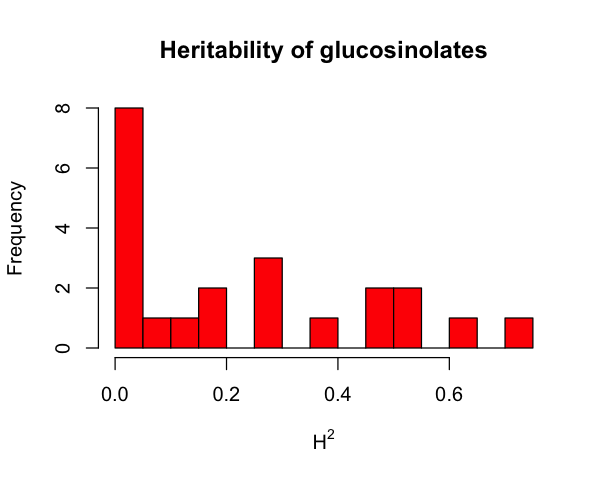

In [9]:
title <- paste0("Heritability of glucosinolates");
hist(results[,"H2"], breaks=25, col="red", main=title, xlab=expression(paste("H"^"2")))

If you were interested in mapping the genetic bases of glucosinolates, which would you start with?